<a href="https://colab.research.google.com/github/Rima-Waleed/Machine-Learning/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


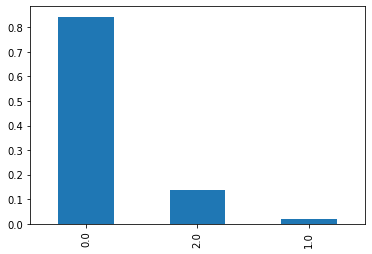

In [ ]:
df['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');

In [ ]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df['Diabetes_012'].unique()

array([0., 2., 1.])

In [ ]:
df.duplicated().sum()

23899

In [ ]:
# there are 23899 duplicated rows so we drop them
df.drop_duplicates(inplace=True)

In [ ]:
df_vis=df.copy()
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $75,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $75,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

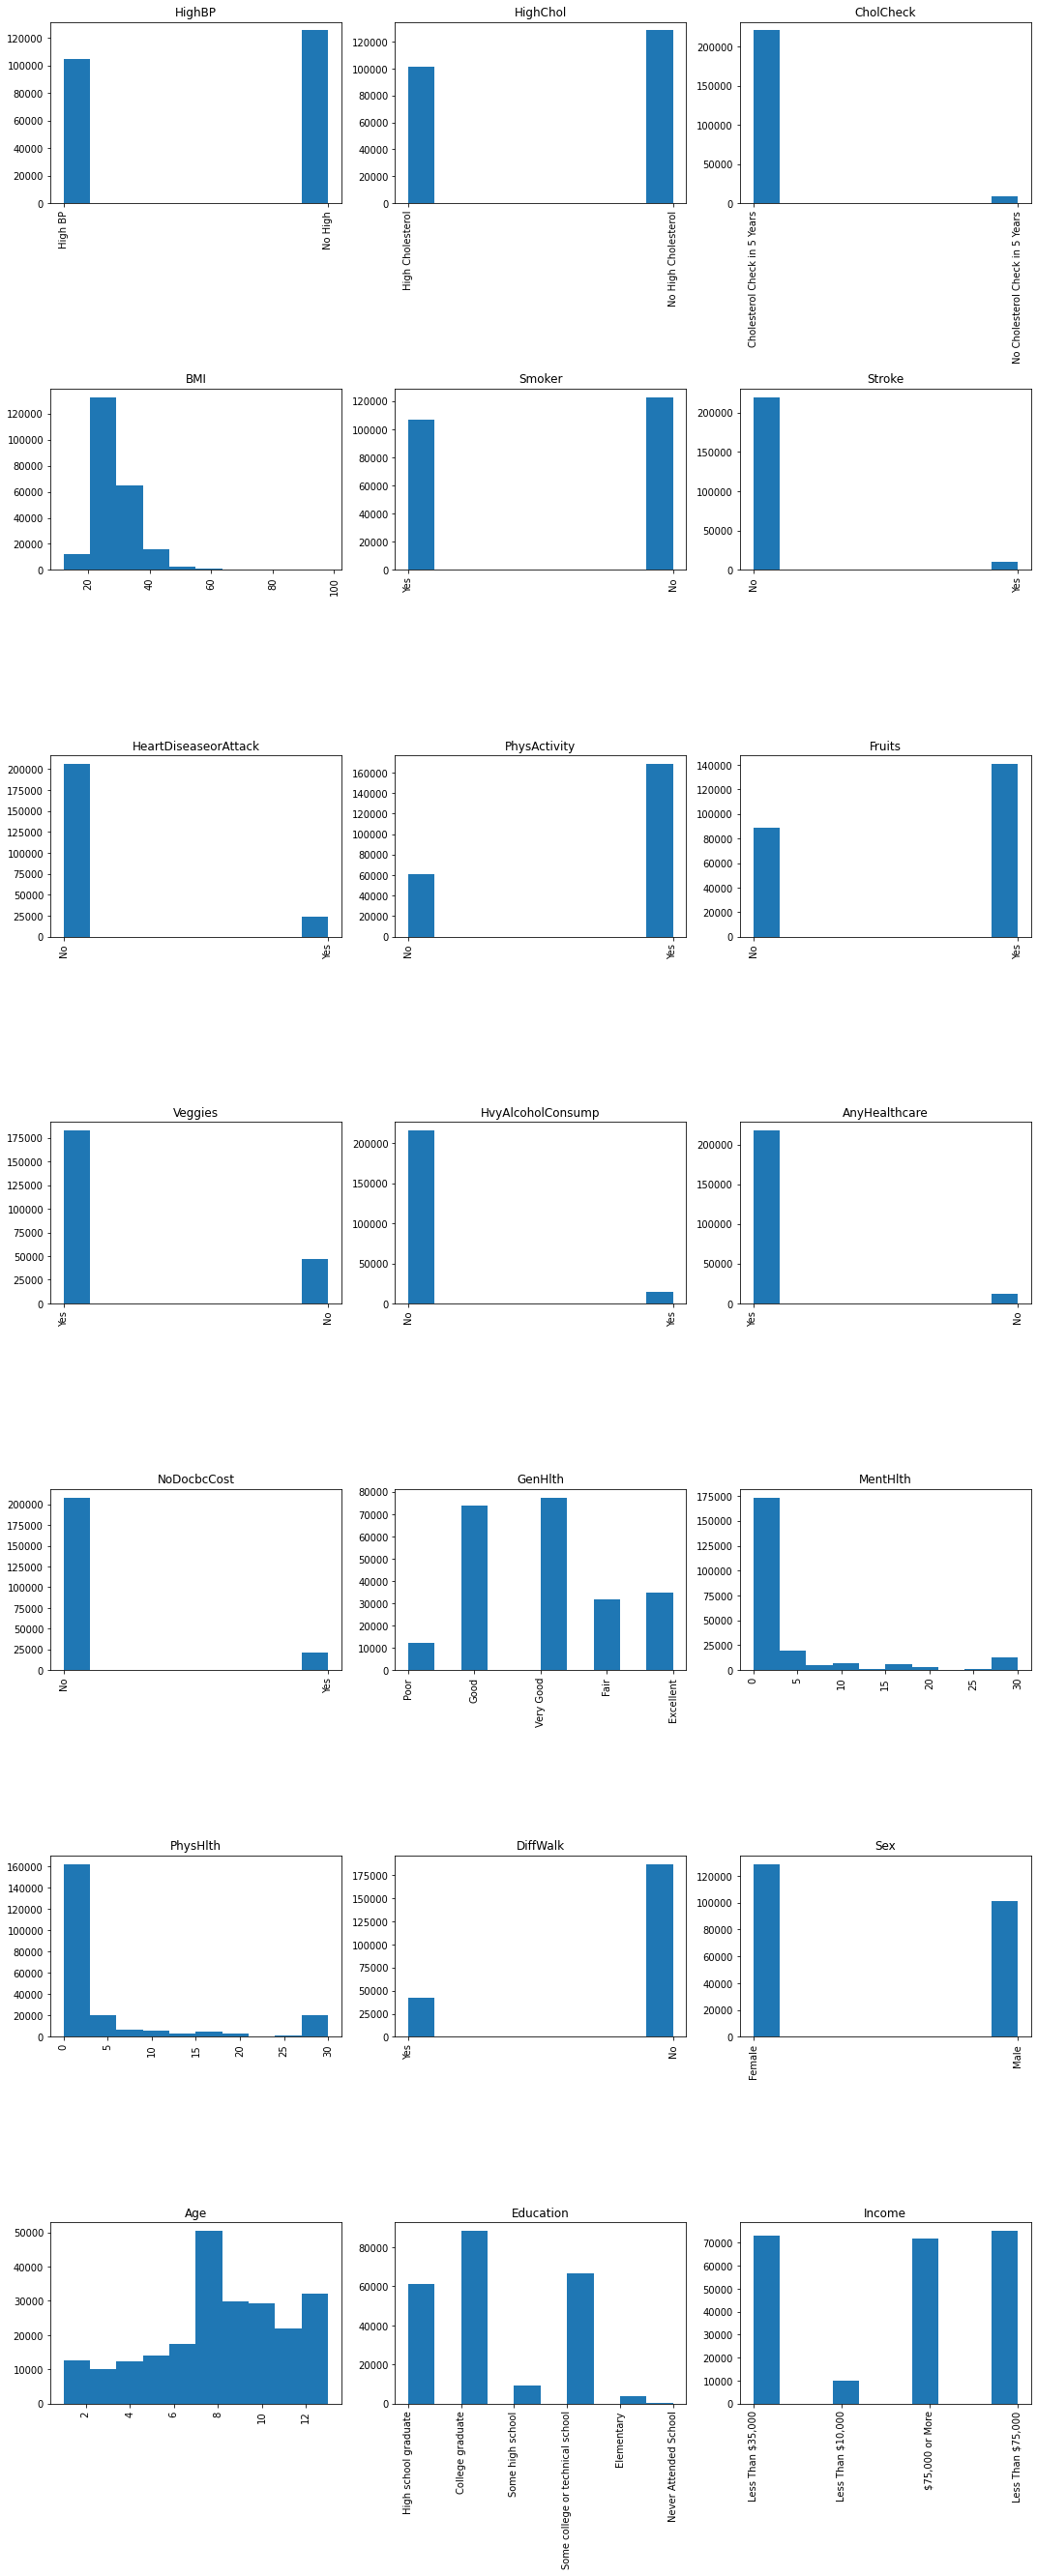

In [ ]:
cols = list(df_vis.columns)
cols_df=cols[1:]
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

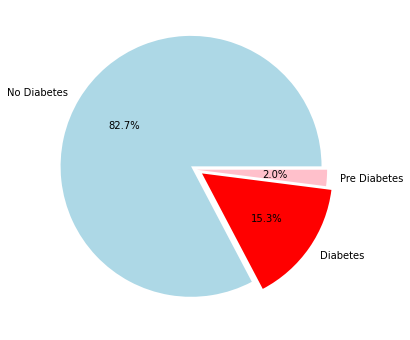

In [ ]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], df_vis['Diabetes_012'].value_counts()[1], df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightblue', 'red', 'pink']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df_vis);

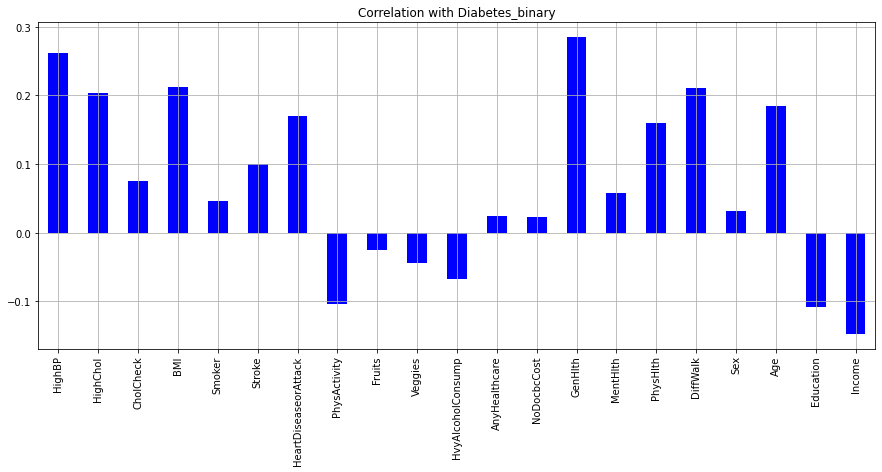

In [ ]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

# Stroke

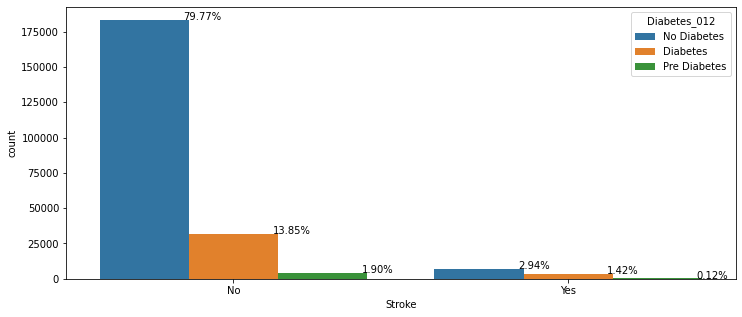

In [ ]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Stroke', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# High blood pressure

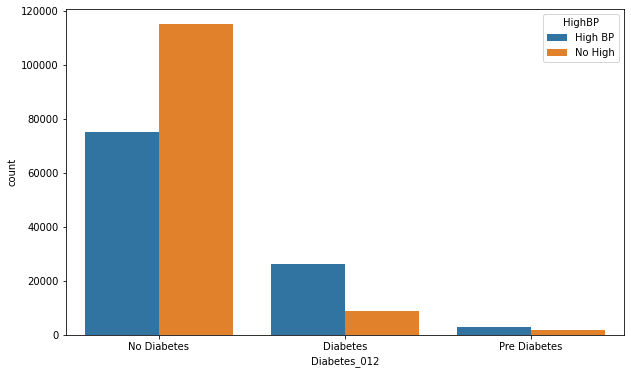

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighBP')

# Split the BMI into (Underweight,Normal weight,Overweight,Obesity)

In [ ]:
BMI=pd.cut( df['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
Diabetes_sum_lst=list(dd.transpose().sum().values)
Diabetes_sum_lst
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,0.482086,15.261296,32.573597,51.683021
No Diabetes,1.504575,35.539798,36.089263,26.866364
Pre Diabetes,0.605405,19.978378,35.264865,44.151351


In [ ]:
from sklearn.preprocessing import StandardScaler
features = list(df.columns)[1:]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Diabetes_012']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Diabetes_012']]], axis = 1)

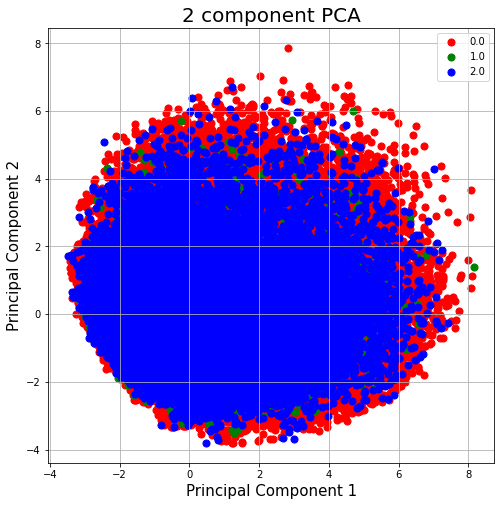

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes_012'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.15621168, 0.08467375])

# preprocessing data

[Text(0, 0, 'Diabetes_012'),
 Text(0, 0, 'HighBP'),
 Text(0, 0, 'HighChol'),
 Text(0, 0, 'CholCheck'),
 Text(0, 0, 'BMI'),
 Text(0, 0, 'Smoker'),
 Text(0, 0, 'Stroke'),
 Text(0, 0, 'HeartDiseaseorAttack'),
 Text(0, 0, 'PhysActivity'),
 Text(0, 0, 'Fruits'),
 Text(0, 0, 'Veggies'),
 Text(0, 0, 'HvyAlcoholConsump'),
 Text(0, 0, 'AnyHealthcare'),
 Text(0, 0, 'NoDocbcCost'),
 Text(0, 0, 'GenHlth'),
 Text(0, 0, 'MentHlth'),
 Text(0, 0, 'PhysHlth'),
 Text(0, 0, 'DiffWalk'),
 Text(0, 0, 'Sex'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income')]

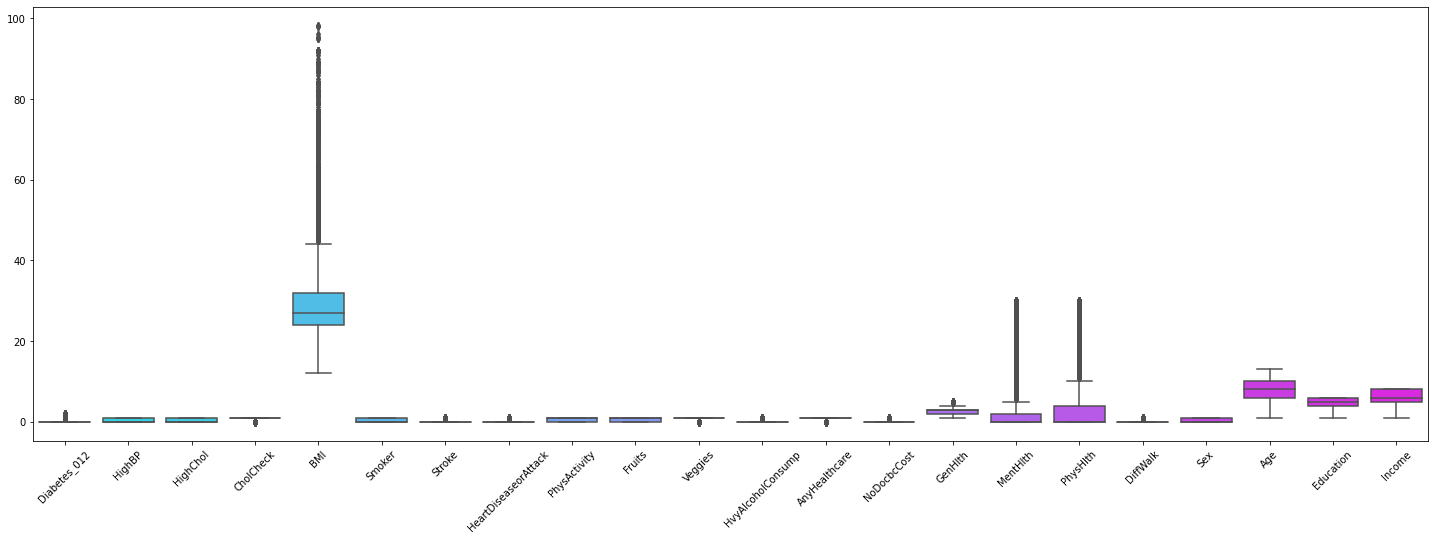

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=df)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [ ]:
df1=df[df['BMI']<70]  # keeping BMI only below 70

# Handling outliers

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df1)

df1['anomaly']= model.predict(df1)
df1.drop(df1[df1['anomaly']==-1].index,inplace = True)
df1.drop(columns=['anomaly'], inplace=True)

# split data

In [ ]:
y = df1['Diabetes_012']
x = df1.drop(['Diabetes_012'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.30, random_state=100, shuffle =True)

# Resampling to reduce imbalances in the data

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

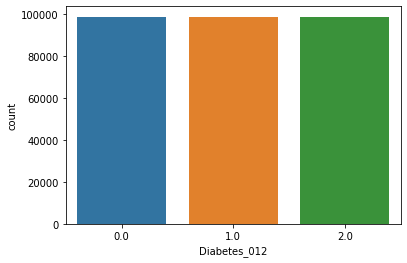

In [ ]:
sns.countplot(y_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, max_features=16)

accuracy =  0.9233221952870777
F1 score 0.8871629314337866
Recall score 0.9233221952870777
Precision score 0.8626089728377093


Text(33.0, 0.5, 'True')

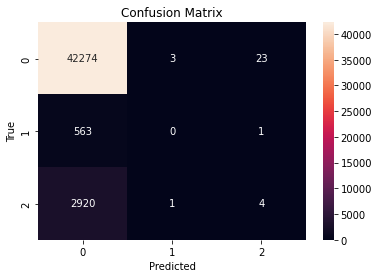

In [ ]:
y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print('accuracy = ', acc_test_rf)
print("F1 score",f1_score(y_test, y_pred_test_rf,average='weighted'))
print("Recall score",recall_score(y_test, y_pred_test_rf,average='weighted'))
print("Precision score",precision_score(y_test, y_pred_test_rf,average='weighted'))
matrix = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

accuracy =  0.873179147830265
F1 score 0.8812905811857487
Recall score 0.873179147830265
Precision score 0.8916216686958363


Text(33.0, 0.5, 'True')

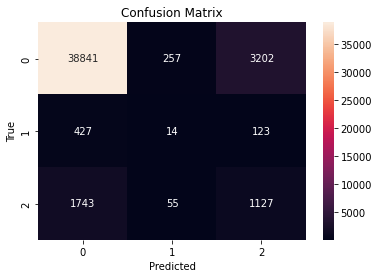

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(X_res, y_res)
y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print('accuracy = ', acc_test_rf)
print("F1 score",f1_score(y_test, y_pred_test_rf,average='weighted'))
print("Recall score",recall_score(y_test, y_pred_test_rf,average='weighted'))
print("Precision score",precision_score(y_test, y_pred_test_rf,average='weighted'))
matrix = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
df_small = df1[['Diabetes_012','HighBP','BMI','Stroke','HeartDiseaseorAttack']]

accuracy =  0.5761427417065234
F1 score 0.6827636595319818
Recall score 0.5761427417065234
Precision score 0.9002743670697246


Text(33.0, 0.5, 'True')

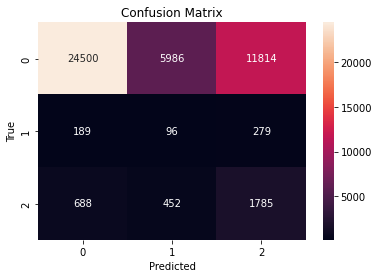

In [ ]:
y = df_small['Diabetes_012']
x = df_small.drop(['Diabetes_012'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.30, random_state=100, shuffle =True)
rf = RandomForestClassifier(n_estimators=100, max_features=4 , max_depth=16)
X_res, y_res = sm.fit_resample(x_train, y_train)
rf.fit(X_res, y_res)
y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print('accuracy = ', acc_test_rf)
print("F1 score",f1_score(y_test, y_pred_test_rf,average='weighted'))
print("Recall score",recall_score(y_test, y_pred_test_rf,average='weighted'))
print("Precision score",precision_score(y_test, y_pred_test_rf,average='weighted'))
matrix = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


accuracy =  0.6415733036318767
F1 score 0.733046013916724
Recall score 0.6415733036318767
Precision score 0.8902337100203463


Text(33.0, 0.5, 'True')

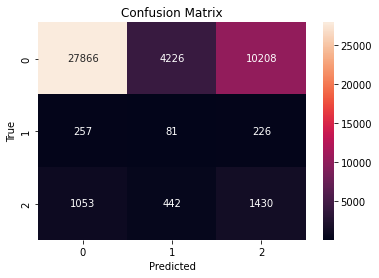

In [ ]:
x = df1.drop('Diabetes_012', 1)
y = df1.Diabetes_012
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.30, random_state=100, shuffle =True)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_res, y_res)

y_pred_test_knn_5 = knn.predict(x_test)

acc_test_rf = accuracy_score(y_test, y_pred_test_knn_5)
print('accuracy = ', acc_test_rf)
print("F1 score",f1_score(y_test, y_pred_test_knn_5,average='weighted'))
print("Recall score",recall_score(y_test, y_pred_test_knn_5,average='weighted'))
print("Precision score",precision_score(y_test, y_pred_test_knn_5,average='weighted'))
matrix = confusion_matrix(y_test, y_pred_test_knn_5)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


